In [ ]:
from urllib import request
import json
import pandas as pd

iso2_country_code = 'DE'

url = "https://wuhan-coronavirus-api.laeyoung.endpoint.ainize.ai/jhu-edu/timeseries?iso2=" + iso2_country_code
req = request.Request(url)
req.add_header('accept', 'application/json')

In [66]:
resp = request.urlopen(req)
body = resp.read().decode('utf-8')

In [67]:
deserialized_body = json.loads(body)

In [68]:
timeseries = deserialized_body[0]['timeseries']
df = pd.DataFrame(timeseries)
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
confirmed,0,0,0,0,0,1,4,4,4,5,...,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848
deaths,0,0,0,0,0,0,0,0,0,0,...,3,3,7,9,11,17,24,28,44,67
recovered,0,0,0,0,0,0,0,0,0,0,...,25,25,46,46,46,67,67,105,113,180


In [69]:
infected = df.loc['confirmed']

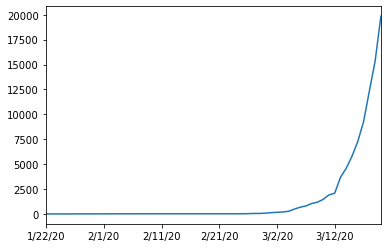

In [70]:
infected.plot()

In [71]:
infections_total = []
for i, v in infected.items(): # I don't know how pandas works...
    infections_total.append(v)
    
    
new_daily_infections = [y - x for x, y in zip(infections_total, infections_total[1:])]
ndf_s = pd.Series(new_daily_infections)

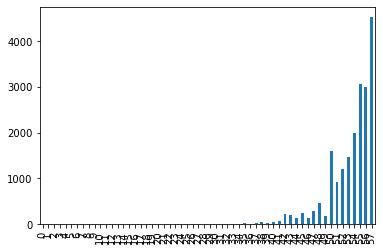

In [72]:
ndf_s.plot.bar()